In [1]:
#Neural Network from scratch#

epoch 0: cost = 1.544690
epoch 20: cost = 0.903150
epoch 40: cost = 0.726532
epoch 60: cost = 0.697850
epoch 80: cost = 0.693799
epoch 100: cost = 0.693237
epoch 120: cost = 0.693160
epoch 140: cost = 0.693149
epoch 160: cost = 0.693147
epoch 180: cost = 0.693147
epoch 200: cost = 0.693147
epoch 220: cost = 0.693147
epoch 240: cost = 0.693147
epoch 260: cost = 0.693147
epoch 280: cost = 0.693147
epoch 300: cost = 0.693147
epoch 320: cost = 0.693147
epoch 340: cost = 0.693147
epoch 360: cost = 0.693147
epoch 380: cost = 0.693147
epoch 400: cost = 0.693147
epoch 420: cost = 0.693147
epoch 440: cost = 0.693147
epoch 460: cost = 0.693147
epoch 480: cost = 0.693147
epoch 500: cost = 0.693147
epoch 520: cost = 0.693147
epoch 540: cost = 0.693147
epoch 560: cost = 0.693147
epoch 580: cost = 0.693147
epoch 600: cost = 0.693147
epoch 620: cost = 0.693147
epoch 640: cost = 0.693147
epoch 660: cost = 0.693147
epoch 680: cost = 0.693147
epoch 700: cost = 0.693147
epoch 720: cost = 0.693147
epoch 7

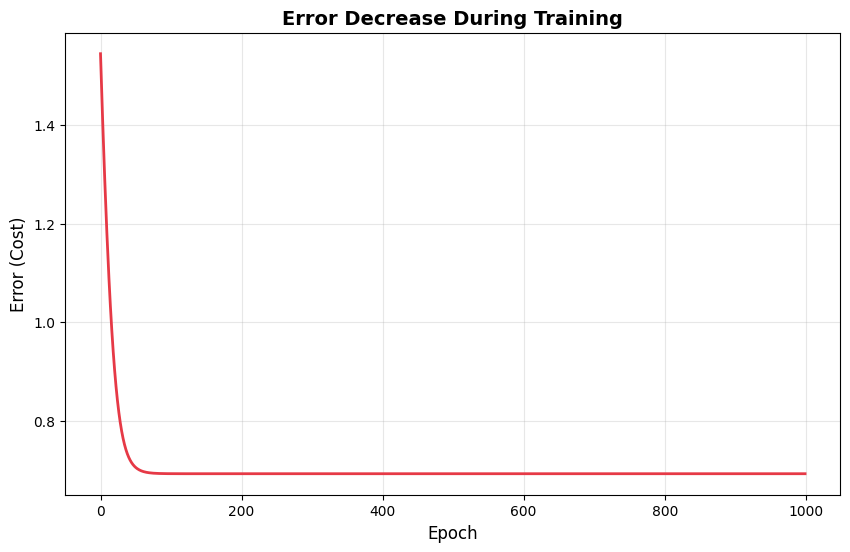

In [44]:
import numpy as np
# STEP 1-> Create Network Architecture
L = 3 # number of layers (excluding hidden layer)
n = [2,3,3,1] #n(l) = No of nodes in each layer

#STEP 2-> CREATE WEIGHTS
'''
now we have n[l]*n[l-1] weights per layer
hence-> we created matrixes of the same size
'''
W1 = np.random.randn(n[1],n[0]) 
W2 = np.random.randn(n[2],n[1])
W3 = np.random.randn(n[3],n[2])

'''
Number of biases = Number of nodes in that layer
Input layer has no bias, hence we start off with layer 1
'''
B1 = np.random.randn(n[1],1)
B2 = np.random.randn(n[2],1)
B3 = np.random.randn(n[3],1)

# STEP 3 -> create training data and labels
def prepare_data():
  X = np.array([
      [150, 70],
      [254, 73],
      [312, 68],
      [120, 60],
      [154, 61],
      [212, 65],
      [216, 67],
      [145, 67],
      [184, 64],
      [130, 69]
  ])
  y = np.array([0,1,1,0,0,1,1,0,1,0])
  m = 10 #number of entries
  AO = X.T
  Y = y.reshape(n[L],m) # to convert it to n[l]*m size where m = number of entries and n[l] numebr of neurons in the last layer

  return AO,Y,m

# STEP 4 -> Define activation function
def g(z):
    return 1/(1+np.exp(-1*z))

#STEP 5 -> Define feed forward network

'''Logic
https://miro.medium.com/v2/resize:fit:1100/format:webp/0*GlvBqiZhpbf55Mm7.png
We take -> Z = Weights * Values + Bias
o/p -> Sigmoid(Z)
This continues for each layer

'''

def feed_forward(AO):
    #layer 1 calculation
    Z1 = W1@AO + B1
    A1 = g(Z1)

    #layer 2 calculation
    Z2 = W2@A1 + B2
    A2 = g(Z2)

    #layer 3 calcultion
    Z3 = W3@A2 + B3
    A3 = g(Z3)

    cache = {
        "AO":AO,
        "A1":A1,
        "A2":A2
    }

    return A3,cache

AO,Y,m = prepare_data()

# Define and calculate the loss function (Binary cross entropy)
'''
L(ŷiyi) = - (yiln(ŷi)+ (1-yi)ln(1-ŷi))
Then take avg weighted sum

Case 1) yi = 0
L(ŷiyi) = -ln(1-ŷi)

If ŷi = 0 -> loss = 0 hence correct
If ŷi = 1 -> loss = -infinity hence correct

Case 2) yi = 1
L(ŷiyi) = -yiln(ŷi) 

If ŷi = 0 -> loss = -infinity hence correct
If ŷi = 1 -> loss = 0 hence correct
'''

def cost_cal(y_pred,y):
    """
    y_hat should be a n^L x m matrix
    y should be a n^L x m matrix
    """
    losses = -((y*np.log(y_pred))+(1-y)*np.log(1-y_pred))
    m = y_pred.reshape(-1).shape[0]
    mean_loss = (1/m) * (np.sum(losses,axis=1))

    return np.sum(mean_loss)

def backprop_layer_3(y_pred,Y,m,A2,W3):
    A3 = y_pred

    #calculate dC/dZ3 using shortcut we had defined earlier
    dC_dZ3 = (1/m)*(A3-Y)
    assert dC_dZ3.shape == (n[3],m)

     # step 2. calculate dC/dW3 = dC/dZ3 * dZ3/dW3 
     # #   we matrix multiply dC/dZ3 with (dZ3/dW3)^T
    dZ3_dW3 = A2
    assert dZ3_dW3.shape == (n[2],m)

    dC_dW3 = dC_dZ3 @ dZ3_dW3.T
    assert dC_dW3.shape == (n[3],n[2])

    # step 3. calculate dC/db3 = np.sum(dC/dZ3, axis=1, keepdims=True)
    dC_db3 = np.sum(dC_dZ3,axis = 1 ,keepdims=True)
    assert dC_db3.shape == (n[3],1)

    #step 4. calculate propagator dc/dA2 = dC/dZ3 * dZ3/dA2
    dZ3_dA2 = W3
    dC_dA2 = W3.T @ dC_dZ3
    assert dC_dA2.shape == (n[2],m)

    return dC_dW3, dC_db3, dC_dA2

def backprop_layer_2(propogater_dc_dA2,A1,A2,W2):
    # STEP 1 calculate dC/dZ2 = dC/dA2 * dA2/dZ2

    # use sigmoid derivation to arrive at this answer:
    #   sigmoid'(z) = sigmoid(z) * (1 - sigmoid(z))
    #     and if a = sigmoid(z), then sigmoid'(z) = a * (1 - a)
    dA2_dZ2 = A2*(1-A2)
    dC_dZ2 = propogater_dc_dA2*dA2_dZ2
    assert dC_dZ2.shape == (n[2],m) # checks if dimensions are correct

    # STEP 2 calculate dC/dW2 = dC/dZ2*dZ2/dW2
    dZ2_dW2 = A1
    assert dZ2_dW2.shape == (n[1],m)

    dC_dW2 = dC_dZ2 @ dZ2_dW2.T
    assert dC_dW2.shape == (n[2],n[1])

    # STEP 3 calculate dC/db2 = np.sum(dC/dZ2,axis = 1,keepdims = True)
    dC_db2 = np.sum(dC_dW2,axis = 1,keepdims=True)
    assert dC_db2.shape == (n[2],1)

    # STEP 4 calculate propogator dC/dA1 = dC/dZ2 * dZ2/dA1
    dZ2_dA1 = W2
    dC_dA1 = dZ2_dA1 @ dC_dZ2
    assert dC_dA1.shape == (n[2],m)

    return dC_dW2, dC_db2,dC_dA1

def backprop_layer_1(propogator_dC_dA1,A1,AO,W1):
    # STEP 1 calculate dC/dZ1 = dC/dA1 * dA1/dZ1

    # use sigmoid derivation to arrive at this answer:
    #   sigmoid'(z) = sigmoid(z) * (1 - sigmoid(z))
    #     and if a = sigmoid(z), then sigmoid'(z) = a * (1 - a)
    dA1_dZ1 = A1*(1-A1)
    dC_dZ1 = propogator_dC_dA1 *dA1_dZ1
    assert dC_dZ1.shape == (n[1],m)

    # STEP 2 calculate dC/dW1 = dC/dZ1*dZ1/dW1
    dZ1_dW1 = AO
    assert dZ1_dW1.shape == (n[0],m)

    dC_dW1 = dC_dZ1 @ dZ1_dW1.T
    assert dC_dW1.shape == (n[1],n[0])

    # STEP 3 calculate dC/db1 = np.sum(dC/dZ1,axis = 1,keepdims = True)
    dC_db1 = np.sum(dC_dW1,axis =1 ,keepdims=True)
    assert dC_db1.shape == (n[1],1)

    return dC_dW1,dC_db1

def train():
    #must use global keyword in order to modify global variables
    global W3,W2,W1,B3,B2,B1

    epochs = 1000 #training for 1000 iterations
    alpha = 0.1 #learning rate
    costs = [] #list to store costs

    for e in range(epochs):
        # STEP 1 feed_foward
        y_pred,cache = feed_forward(AO)

        # STEP 2 calculate cost
        error = cost_cal(y_pred,Y)
        costs.append(error)

        # STEP 3 backpropogation calculations
        dC_dW3,dC_db3,dC_dA2 = backprop_layer_3(
            y_pred,
            Y,
            m,
            A2 = cache["A2"],
            W3 = W3
        )

        dC_dW2,dC_db2,dC_dA1 = backprop_layer_2(
            propogater_dc_dA2=dC_dA2,
            A1 = cache["A1"],
            A2 = cache["A2"],
            W2= W2
        )

        dC_dW1,dC_db1 = backprop_layer_1(
            propogator_dC_dA1= dC_dA1,
            A1 = cache["A1"],
            AO = cache["AO"],
            W1 = W1
        )

        # STEP 4 update weights
        W3 = W3-(alpha*dC_dW3)
        W2 = W2-(alpha*dC_dW2)
        W1 = W1-(alpha*dC_dW1)

        B3 = B3-(alpha*dC_db3)
        B2 = B2-(alpha*dC_db2)
        B1 = B1-(alpha*dC_db1)

        if e%20 == 0:
            print(f"epoch {e}: cost = {error:4f}")

    return costs

import matplotlib.pyplot as plt

def plot_error(costs):
    """
    Simple visualization of error/cost decreasing over time
    """
    plt.figure(figsize=(10, 6))
    plt.plot(costs, linewidth=2, color='#E63946')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Error (Cost)', fontsize=12)
    plt.title('Error Decrease During Training', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.show()

# Usage after training:
cost_history = train()
plot_error(cost_history)
     

In [ ]:
## BELOW IS MY FIRST ATTEMPT CODE #

In [8]:
# STEP 1-> Create Network Architecture
L = 3 # number of layers (excluding hidden layer)
n = [2,3,3,1] #n(l) = No of nodes in each layer

#STEP 2-> CREATE WEIGHTS
'''
now we have n[l]*n[l-1] weights per layer
hence-> we created matrixes of the same size
'''
W1 = np.random.randn(n[1],n[0]) 
W2 = np.random.randn(n[2],n[1])
W3 = np.random.randn(n[3],n[2])

'''
Number of biases = Number of nodes in that layer
Input layer has no bias, hence we start off with layer 1
'''
B1 = np.random.randn(n[1],1)
B2 = np.random.randn(n[2],1)
B3 = np.random.randn(n[3],1)

In [9]:
# STEP 3 -> create training data and labels
def prepare_data():
  X = np.array([
      [150, 70],
      [254, 73],
      [312, 68],
      [120, 60],
      [154, 61],
      [212, 65],
      [216, 67],
      [145, 67],
      [184, 64],
      [130, 69]
  ])
  y = np.array([0,1,1,0,0,1,1,0,1,0])
  m = 10 #number of entries
  AO = X.T
  Y = y.reshape(n[L],m) # to convert it to n[l]*m size where m = number of entries and n[l] numebr of neurons in the last layer

  return AO,Y,m

In [10]:
# STEP 4 -> Define activation function
def g(z):
    return 1/(1+np.exp(-1*z))

In [11]:
#STEP 5 -> Define feed forward network

'''Logic
https://miro.medium.com/v2/resize:fit:1100/format:webp/0*GlvBqiZhpbf55Mm7.png
We take -> Z = Weights * Values + Bias
o/p -> Sigmoid(Z)
This continues for each layer

'''

def feed_forward(AO):
    #layer 1 calculation
    Z1 = W1@AO + B1
    A1 = g(Z1)

    #layer 2 calculation
    Z2 = W2@A1 + B2
    A2 = g(Z2)

    #layer 3 calcultion
    Z3 = W3@A2 + B3
    A3 = g(Z3)

    cache = {
        "AO":AO,
        "A1":A1,
        "A2":A2
    }

    return A3,cache

In [12]:
AO,Y,m = prepare_data()

In [35]:
# Define and calculate the loss function (Binary cross entropy)
'''
L(ŷiyi) = - (yiln(ŷi)+ (1-yi)ln(1-ŷi))
Then take avg weighted sum

Case 1) yi = 0
L(ŷiyi) = -ln(1-ŷi)

If ŷi = 0 -> loss = 0 hence correct
If ŷi = 1 -> loss = -infinity hence correct

Case 2) yi = 1
L(ŷiyi) = -yiln(ŷi) 

If ŷi = 0 -> loss = -infinity hence correct
If ŷi = 1 -> loss = 0 hence correct
'''

def cost_cal(y_pred,y):
    """
    y_hat should be a n^L x m matrix
    y should be a n^L x m matrix
    """
    losses = -((y*np.log(y_pred))+(1-y)*np.log(1-y_pred))
    m = y_pred.reshape(-1).shape[0]
    mean_loss = (1/m) * (np.sum(losses,axis=1))

    return np.sum(mean_loss)


In [36]:
def backprop_layer_3(y_pred,Y,m,A2,W3):
    A3 = y_pred

    #calculate dC/dZ3 using shortcut we had defined earlier
    dC_dZ3 = (1/m)*(A3-Y)
    assert dC_dZ3.shape == (n[3],m)

     # step 2. calculate dC/dW3 = dC/dZ3 * dZ3/dW3 
     # #   we matrix multiply dC/dZ3 with (dZ3/dW3)^T
    dZ3_dW3 = A2
    assert dZ3_dW3.shape == (n[2],m)

    dC_dW3 = dC_dZ3 @ dZ3_dW3.T
    assert dC_dW3.shape == (n[3],n[2])

    # step 3. calculate dC/db3 = np.sum(dC/dZ3, axis=1, keepdims=True)
    dC_db3 = np.sum(dC_dZ3,axis = 1 ,keepdims=True)
    assert dC_db3.shape == (n[3],1)

    #step 4. calculate propagator dc/dA2 = dC/dZ3 * dZ3/dA2
    dZ3_dA2 = W3
    dC_dA2 = W3.T @ dC_dZ3
    assert dC_dA2.shape == (n[2],m)

    return dC_dW3, dC_db3, dC_dA2




     

In [37]:
def backprop_layer_2(propogater_dc_dA2,A1,A2,W2):
    # STEP 1 calculate dC/dZ2 = dC/dA2 * dA2/dZ2

    # use sigmoid derivation to arrive at this answer:
    #   sigmoid'(z) = sigmoid(z) * (1 - sigmoid(z))
    #     and if a = sigmoid(z), then sigmoid'(z) = a * (1 - a)
    dA2_dZ2 = A2*(1-A2)
    dC_dZ2 = propogater_dc_dA2*dA2_dZ2
    assert dC_dZ2.shape == (n[2],m) # checks if dimensions are correct

    # STEP 2 calculate dC/dW2 = dC/dZ2*dZ2/dW2
    dZ2_dW2 = A1
    assert dZ2_dW2.shape == (n[1],m)

    dC_dW2 = dC_dZ2 @ dZ2_dW2.T
    assert dC_dW2.shape == (n[2],n[1])

    # STEP 3 calculate dC/db2 = np.sum(dC/dZ2,axis = 1,keepdims = True)
    dC_db2 = np.sum(dC_dW2,axis = 1,keepdims=True)
    assert dC_db2.shape == (n[2],1)

    # STEP 4 calculate propogator dC/dA1 = dC/dZ2 * dZ2/dA1
    dZ2_dA1 = W2
    dC_dA1 = dZ2_dA1 @ dC_dZ2
    assert dC_dA1.shape == (n[2],m)

    return dC_dW2, dC_db2,dC_dA1

def backprop_layer_1(propogator_dC_dA1,A1,AO,W1):
    # STEP 1 calculate dC/dZ1 = dC/dA1 * dA1/dZ1

    # use sigmoid derivation to arrive at this answer:
    #   sigmoid'(z) = sigmoid(z) * (1 - sigmoid(z))
    #     and if a = sigmoid(z), then sigmoid'(z) = a * (1 - a)
    dA1_dZ1 = A1*(1-A1)
    dC_dZ1 = propogator_dC_dA1 *dA1_dZ1
    assert dC_dZ1.shape == (n[1],m)

    # STEP 2 calculate dC/dW1 = dC/dZ1*dZ1/dW1
    dZ1_dW1 = AO
    assert dZ1_dW1.shape == (n[0],m)

    dC_dW1 = dC_dZ1 @ dZ1_dW1.T
    assert dC_dW1.shape == (n[1],n[0])

    # STEP 3 calculate dC/db1 = np.sum(dC/dZ1,axis = 1,keepdims = True)
    dC_db1 = np.sum(dC_dW1,axis =1 ,keepdims=True)
    assert dC_db1.shape == (n[1],1)

    return dC_dW1,dC_db1



In [38]:
# EXAMPLE SHOWING HOW THE LAYERS WILL BE CHAINED DURING FUNCTION CALL
'''
y_pred,cache = feed_forward(AO)

dc_dW3,dC_db3,dC_dA2 = backprop_layer_3(
    y_pred,
    Y,
    m,
    A2 = cache["A2"],
    W3 = W3
)

dC_dW2,dC_db2,dC_dA1 = backprop_layer_2(
    propogater_dc_dA2=dC_dA2,
    A1 = cache["A1"],
    A2 = cache["A2"],
    W2 = W2
)

dC_dW1,dC_db1 = backprop_layer_1(
    propogator_dC_dA1= dC_dA1,
    A1 = cache["A1"],
    AO = cache["AO"],
    W1 = W1
)

'''

'\ny_pred,cache = feed_forward(AO)\n\ndc_dW3,dC_db3,dC_dA2 = backprop_layer_3(\n    y_pred,\n    Y,\n    m,\n    A2 = cache["A2"],\n    W3 = W3\n)\n\ndC_dW2,dC_db2,dC_dA1 = backprop_layer_2(\n    propogater_dc_dA2=dC_dA2,\n    A1 = cache["A1"],\n    A2 = cache["A2"],\n    W2 = W2\n)\n\ndC_dW1,dC_db1 = backprop_layer_1(\n    propogator_dC_dA1= dC_dA1,\n    A1 = cache["A1"],\n    AO = cache["AO"],\n    W1 = W1\n)\n\n'

In [40]:
def train():
    #must use global keyword in order to modify global variables
    global W3,W2,W1,B3,B2,B1

    epochs = 1000 #training for 1000 iterations
    alpha = 0.1 #learning rate
    costs = [] #list to store costs

    for e in range(epochs):
        # STEP 1 feed_foward
        y_pred,cache = feed_forward(AO)

        # STEP 2 calculate cost
        error = cost_cal(y_pred,Y)
        costs.append(error)

        # STEP 3 backpropogation calculations
        dC_dW3,dC_db3,dC_dA2 = backprop_layer_3(
            y_pred,
            Y,
            m,
            A2 = cache["A2"],
            W3 = W3
        )

        dC_dW2,dC_db2,dC_dA1 = backprop_layer_2(
            propogater_dc_dA2=dC_dA2,
            A1 = cache["A1"],
            A2 = cache["A2"],
            W2= W2
        )

        dC_dW1,dC_db1 = backprop_layer_1(
            propogator_dC_dA1= dC_dA1,
            A1 = cache["A1"],
            AO = cache["AO"],
            W1 = W1
        )

        # STEP 4 update weights
        W3 = W3-(alpha*dC_dW3)
        W2 = W2-(alpha*dC_dW2)
        W1 = W1-(alpha*dC_dW1)

        B3 = B3-(alpha*dC_db3)
        B2 = B2-(alpha*dC_db2)
        B1 = B1-(alpha*dC_db1)

        if e%20 == 0:
            print(f"epoch {e}: cost = {error:4f}")

    return costs

epoch 0: cost = 0.693147
epoch 20: cost = 0.693147
epoch 40: cost = 0.693147
epoch 60: cost = 0.693147
epoch 80: cost = 0.693147
epoch 100: cost = 0.693147
epoch 120: cost = 0.693147
epoch 140: cost = 0.693147
epoch 160: cost = 0.693147
epoch 180: cost = 0.693147
epoch 200: cost = 0.693147
epoch 220: cost = 0.693147
epoch 240: cost = 0.693147
epoch 260: cost = 0.693147
epoch 280: cost = 0.693147
epoch 300: cost = 0.693147
epoch 320: cost = 0.693147
epoch 340: cost = 0.693147
epoch 360: cost = 0.693147
epoch 380: cost = 0.693147
epoch 400: cost = 0.693147
epoch 420: cost = 0.693147
epoch 440: cost = 0.693147
epoch 460: cost = 0.693147
epoch 480: cost = 0.693147
epoch 500: cost = 0.693147
epoch 520: cost = 0.693147
epoch 540: cost = 0.693147
epoch 560: cost = 0.693147
epoch 580: cost = 0.693147
epoch 600: cost = 0.693147
epoch 620: cost = 0.693147
epoch 640: cost = 0.693147
epoch 660: cost = 0.693147
epoch 680: cost = 0.693147
epoch 700: cost = 0.693147
epoch 720: cost = 0.693147
epoch 7

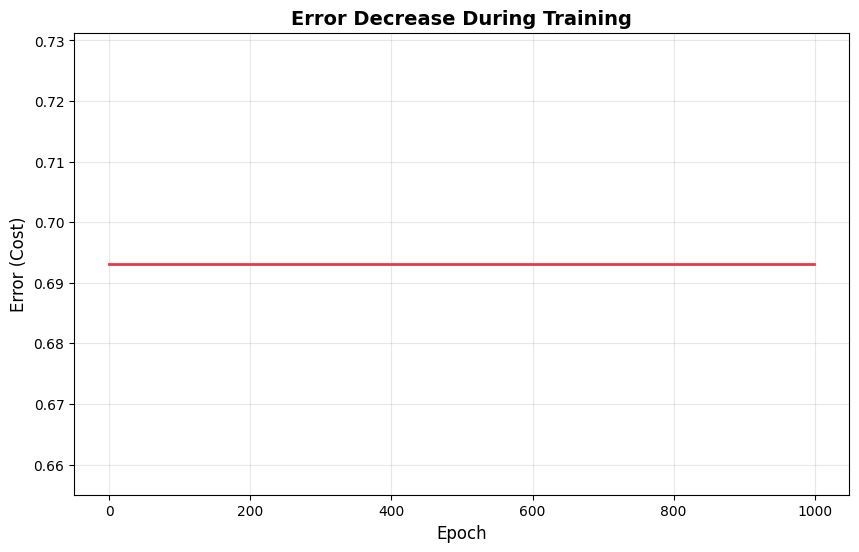

In [43]:
import matplotlib.pyplot as plt

def plot_error(costs):
    """
    Simple visualization of error/cost decreasing over time
    """
    plt.figure(figsize=(10, 6))
    plt.plot(costs, linewidth=2, color='#E63946')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Error (Cost)', fontsize=12)
    plt.title('Error Decrease During Training', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.show()

# Usage after training:
cost_history = train()
plot_error(cost_history)